# Task 1: Load the built-in image 'coffee' of the skimage libraries.

<ipython-input-3-ca4350382774>:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(IC) # visualize image using imshow function
<ipython-input-3-ca4350382774>:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


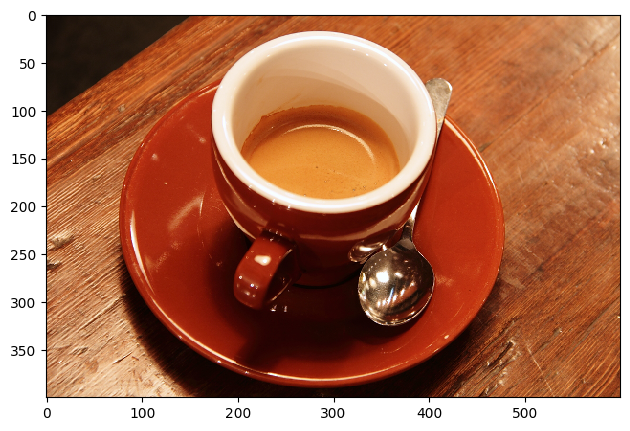

In [3]:
import skimage as sk # load skimage libraries
IC = sk.data.coffee() # load a color image from the skimage built-in dataset
# change colormap to visualize image
sk.io.imshow(IC) # visualize image using imshow function
sk.io.show()

# Task 2: Use the skimage function random_noise to add each of the 7 different types of noise available and generate a 4x2 panel figure with the original image and the 7 corrupted versions.

The noise types are:

    ‘gaussian’ Gaussian-distributed additive noise.
    ‘localvar’ Gaussian-distributed additive noise, with specified local variance at each point of image.
    ‘poisson’ Poisson-distributed noise generated from the data.
    ‘salt’ Replaces random pixels with 1.
    ‘pepper’ Replaces random pixels with 0 (for unsigned images) or
    1 (for signed images).
    ‘s&p’ Replaces random pixels with either 1 or low_val, where low_val is 0 for unsigned images or -1 for signed images.
    ‘speckle’ Multiplicative noise using out = image + n*image, where n is Gaussian noise with specified mean & variance.


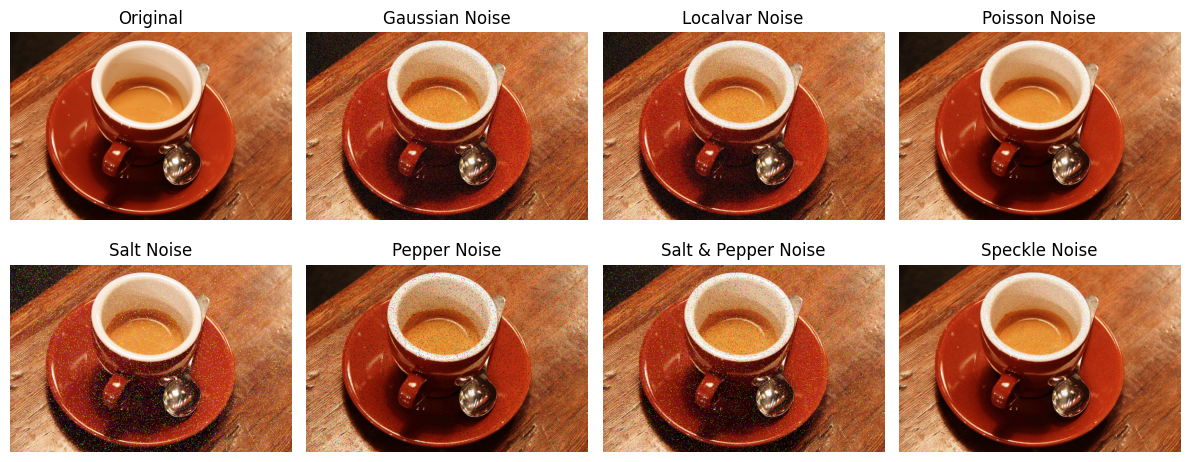

In [4]:
import skimage as sk
import matplotlib
import matplotlib.pyplot as plt


coffee_default = sk.data.coffee()

coffee_gaussian = sk.util.random_noise(coffee_default, mode='gaussian', rng=None, clip=True)
coffee_localvar = sk.util.random_noise(coffee_default, mode='localvar', rng=None, clip=True)
coffee_poisson = sk.util.random_noise(coffee_default, mode='poisson', rng=None, clip=True)
coffee_salt = sk.util.random_noise(coffee_default, mode='salt', rng=None, clip=True)
coffee_pepper = sk.util.random_noise(coffee_default, mode='pepper', rng=None, clip=True)
coffee_sandp = sk.util.random_noise(coffee_default, mode='s&p', rng=None, clip=True)
coffee_speckle = sk.util.random_noise(coffee_default, mode='speckle', rng=None, clip=True)

images = [
    (coffee_default, "Original"),
    (coffee_gaussian, "Gaussian Noise"),
    (coffee_localvar, "Localvar Noise"),
    (coffee_poisson, "Poisson Noise"),
    (coffee_salt, "Salt Noise"),
    (coffee_pepper, "Pepper Noise"),
    (coffee_sandp, "Salt & Pepper Noise"),
    (coffee_speckle, "Speckle Noise"),
]

# 4x2 grid
fig, axs = plt.subplots(2, 4, figsize=(12, 5))
axs = axs.flatten()

for i, (img, title) in enumerate(images):
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()



# Task 3: Select one of the noise types and generate 3 noisy images with different noise intensity levels. Represent the original image along with them in a 2x2 figure.

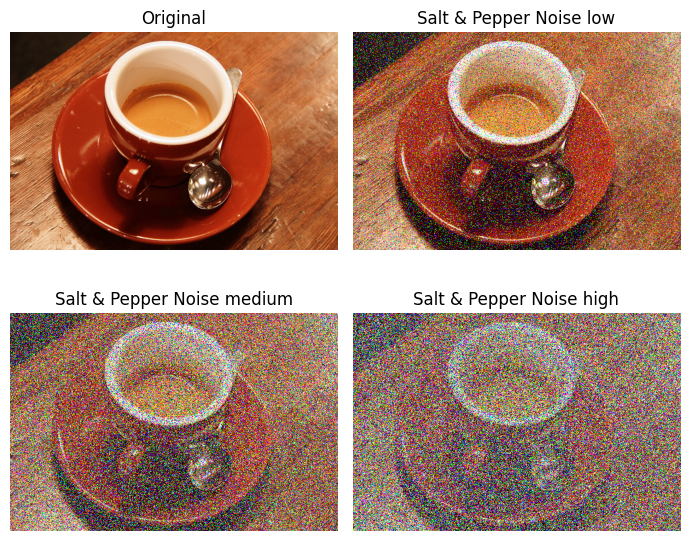

In [5]:
coffee_sp_low = sk.util.random_noise(coffee_default, mode='s&p', amount=0.2)
coffee_sp_medium = sk.util.random_noise(coffee_default, mode='s&p', amount=0.5)
coffee_sp_high = sk.util.random_noise(coffee_default, mode='s&p', amount=0.7)

images = [
    (coffee_default, "Original"),
    (coffee_sp_low, "Salt & Pepper Noise low"),
    (coffee_sp_medium, "Salt & Pepper Noise medium"),
    (coffee_sp_high, "Salt & Pepper Noise high"),

]

# 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(7, 6))
axs = axs.flatten()

for i, (img, title) in enumerate(images):
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# - Task 4: The standard deviation for Gaussian kernel affects the behavior of the gaussian filter (parameter sigma). Explore the effect of the parameter sigma when applying a gaussian filter to the tree noisy images generated in the previus task. Represent and comment the results.

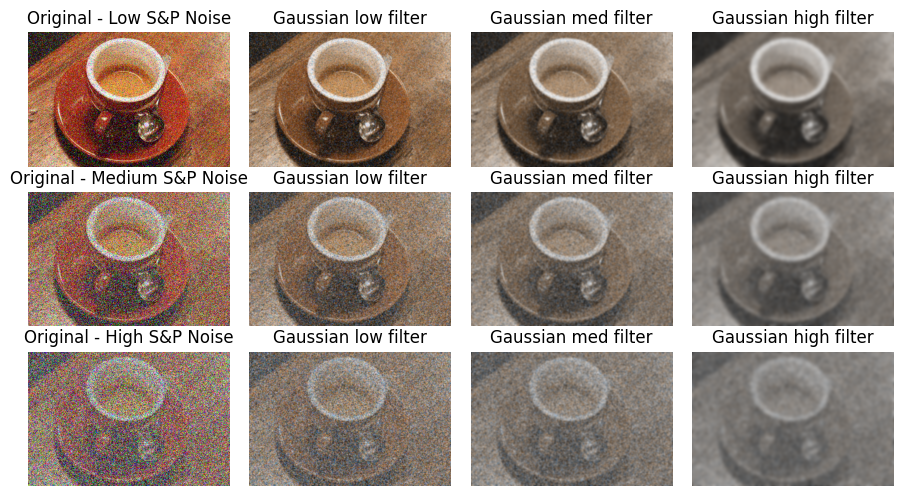

In [6]:
gauss_low_low = sk.filters.gaussian(coffee_sp_low, sigma=1, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_med_low = sk.filters.gaussian(coffee_sp_low, sigma=2, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_high_low = sk.filters.gaussian(coffee_sp_low, sigma=5, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)

gauss_low_med = sk.filters.gaussian(coffee_sp_medium, sigma=1, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_med_med = sk.filters.gaussian(coffee_sp_medium, sigma=2, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_high_med = sk.filters.gaussian(coffee_sp_medium, sigma=5, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)

gauss_low_high = sk.filters.gaussian(coffee_sp_high, sigma=1, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_med_high = sk.filters.gaussian(coffee_sp_high, sigma=2, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)
gauss_high_high = sk.filters.gaussian(coffee_sp_high, sigma=5, mode='nearest', cval=0, preserve_range=False, truncate=4.0, channel_axis=None, out=None)

images = [
    (coffee_sp_low, "Original - Low S&P Noise"),
    (gauss_low_low, "Gaussian low filter"),
    (gauss_med_low, "Gaussian med filter"),
    (gauss_high_low, "Gaussian high filter"),
    (coffee_sp_medium, "Original - Medium S&P Noise"),
    (gauss_low_med, "Gaussian low filter"),
    (gauss_med_med, "Gaussian med filter"),
    (gauss_high_med, "Gaussian high filter"),
    (coffee_sp_high, "Original - High S&P Noise"),
    (gauss_low_high, "Gaussian low filter"),
    (gauss_med_high, "Gaussian med filter"),
    (gauss_high_high, "Gaussian high filter"),
]

# 4x2 grid
fig, axs = plt.subplots(3, 4, figsize=(9, 5))
axs = axs.flatten()

for i, (img, title) in enumerate(images):
    axs[i].imshow(img)
    axs[i].set_title(title)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Comment: Gaussian filter works great with a low noise, but has a diffcult time with high noise s&P. The higher the sigma value, the less colorful and more "grainy" the image gets.

# Task 5: Detect the edges of the bricks in the built-in image 'bricks' using a Prewitt edge detection filter. Quantify what is the fraction of the image corresponding to bricks and to edges.

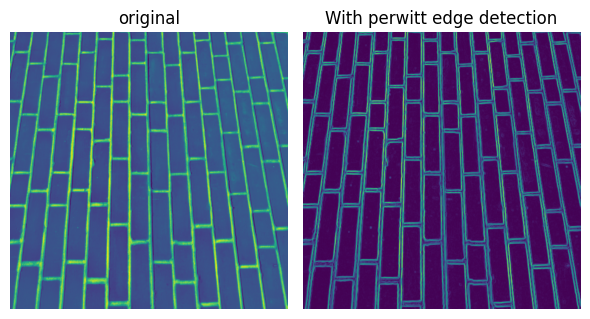

In [7]:
import skimage as sk # load skimage libraries

bricks = sk.data.brick() # load a color image from the skimage built-in dataset
bricks_perwitt = sk.filters.prewitt(image=bricks, mask=None, axis=None, mode='reflect', cval=0.0)

fig, axs = plt.subplots(1, 2, figsize=(6, 6))
axs = axs.flatten()

axs[0].imshow(bricks)
axs[0].set_title("original")
axs[0].axis('off')

axs[1].imshow(bricks_perwitt)
axs[1].set_title("With perwitt edge detection")
axs[1].axis('off')

plt.tight_layout()
plt.show()

## Task 6: Apply a high-pass filter and a low-pass filter in the frequency domain to the skimage built-in image 'grass'. Represent the results and discuss the correspondance between spatial patterns in the original image and high/low frequency components of its the Fourier transform.

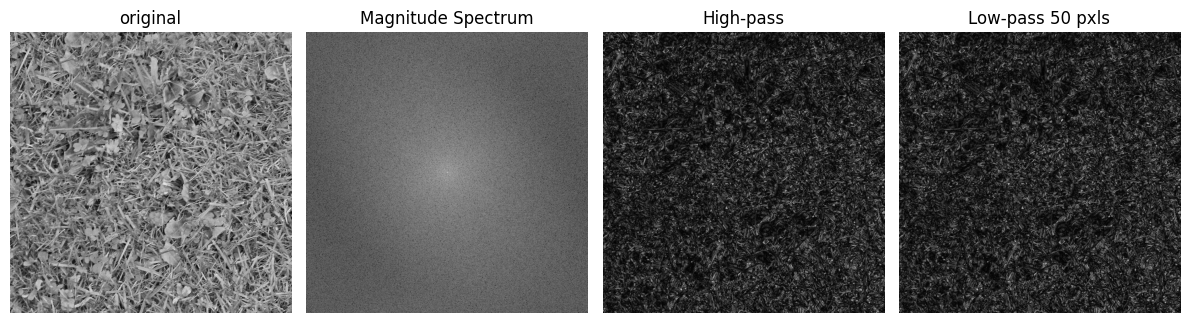

In [14]:
import numpy as np
from skimage import data
from skimage.color import rgb2gray
from matplotlib import pyplot as plt


img = data.grass()

#Fourier Transform
f = np.fft.fft2(img) # Discrete Fourier Transform using FFT algorithm
fshift = np.fft.fftshift(f) # Shift to have zero frequency (origin) at the center of the image
magnitude_spectrum = 20*np.log(np.abs(fshift)) # Logarithmic scale for better visualization of the differences in powert spectrum

#High freq
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

#Low freq
nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back2 = np.fft.ifft2(f_ishift)
img_back2 = np.abs(img_back)

#Plotting

fig, axs = plt.subplots(1, 4, figsize=(12, 12))
axs = axs.flatten()

axs[0].imshow(img, cmap = 'gray')
axs[0].set_title("original")
axs[0].axis('off')

axs[1].imshow(magnitude_spectrum, cmap = 'gray')
axs[1].set_title("Magnitude Spectrum")
axs[1].axis('off')

axs[2].imshow(img_back, cmap = 'gray')
axs[2].set_title("High-pass")
axs[2].axis('off')

axs[3].imshow(img_back, cmap = 'gray')
axs[3].set_title("Low-pass 50 pxls")
axs[3].axis('off')

plt.tight_layout()
plt.show()



plt.show()
